Import relevant libraries for data handling and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [61]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

Read the data into a dataframe

In [3]:
df = pd.read_csv('data.csv', index_col=None)

In [4]:
df.head()

,Unnamed: 0,age,sex,race,medication,lab_A_before,lab_B_before,lab_C_before,lab_D_before,lab_A_after,lab_B_after,lab_C_after,lab_D_after
0,0,NaN,Female,Other,Drug X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,Female,White or Caucasian,Drug X,128.0,NaN,NaN,NaN,57.6,NaN,NaN,NaN
2,2,41.0,Female,White or Caucasian,Drug X,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN
3,3,NaN,Female,Black or African American,Drug W,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN
4,4,NaN,Female,Black or African American,Drug W,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN


In [5]:
df.drop(columns='Unnamed: 0', inplace=True)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           6374 non-null   float64
 1   sex           9172 non-null   object 
 2   race          8999 non-null   object 
 3   medication    9172 non-null   object 
 4   lab_A_before  8730 non-null   float64
 5   lab_B_before  8363 non-null   float64
 6   lab_C_before  8370 non-null   float64
 7   lab_D_before  349 non-null    float64
 8   lab_A_after   8730 non-null   float64
 9   lab_B_after   8359 non-null   float64
 10  lab_C_after   8358 non-null   float64
 11  lab_D_after   41 non-null     float64
dtypes: float64(9), object(3)
memory usage: 860.0+ KB


By looking at dataframe info we can see the dataset consists of a total of 9,172 records, with 13 columns. Here's a brief overview of the key details:

- 'age' contains 6,374 non-null values, representing the age of patients at treatment start.
- 'sex' has 9,172 non-null values, indicating the sex at birth of patients.
- 'race' includes 8,999 non-null values, denoting the racial background of patients.
- 'medication' contains 9,172 non-null values, representing the specific breast cancer medication administered.
- 'lab_A_before,' 'lab_B_before,' 'lab_C_before,' and 'lab_D_before' have varying counts of non-null values, indicating measurements taken before treatment.
- 'lab_A_after,' 'lab_B_after,' 'lab_C_after,' and 'lab_D_after' also have varying counts of non-null values, indicating measurements taken after treatment.

It's important to note that several columns have missing data, which may require data cleaning and imputation for further analysis. Additionally, the 'lab_D_before' and 'lab_D_after' columns have relatively few non-null values, suggesting potential data limitations for these variables.


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,6374.0,93.260747,1419.840408,41.00,54.00,62.00,72.000,65526.00
lab_A_before,8730.0,108.700305,37.522670,2.00,87.00,104.00,126.000,600.00
lab_B_before,8363.0,0.976056,0.200360,0.17,0.86,0.96,1.065,2.33
lab_C_before,8370.0,113.640746,41.551650,1.40,93.00,109.00,128.000,881.00
lab_D_before,349.0,29.870057,21.080504,0.10,21.00,26.00,31.000,200.00
lab_A_after,8730.0,97.769977,68.427319,0.00,43.20,90.10,139.700,673.30
lab_B_after,8359.0,0.902942,0.992265,0.00,0.20,0.59,1.260,13.64
lab_C_after,8358.0,109.860254,197.693519,0.00,12.10,46.80,135.475,6738.10
lab_D_after,41.0,33.385366,70.241058,0.00,1.50,7.10,27.300,329.40


Here are key insights from the statistics:

- 'age' (Age at Treatment Start):
  - The mean age is approximately 93.26, with a wide range of values.
  - The minimum and maximum ages are 41 and 65,526, respectively.
  - The data shows variability in ages, with some potentially extreme values. We need to remove outliers and perform imputation.

- Lab Measurements (Before and After Treatment):
  - 'lab_A_before,' 'lab_B_before,' 'lab_C_before,' and 'lab_D_before':
    - These columns represent various lab measurements before treatment.
    - The mean and standard deviation vary for each measurement.
    - The range of values varies, with some columns having minimum values close to zero.
  
  - 'lab_A_after,' 'lab_B_after,' 'lab_C_after,' and 'lab_D_after':
    - These columns represent the same lab measurements after treatment.
    - Similar to before treatment, there is variability in the mean and standard deviation.
    - The range of values varies, and some columns have minimum values close to zero.

- Notable Observations:
  - Some columns exhibit a wide range of values with potentially extreme outliers.
  - The presence of missing data is evident, as the count is lower than the total number of records (9,172) for some columns.

It's important to be cautious when interpreting these statistics, especially in cases where the data shows extreme values or high variability.

## Let's begin the data quality and cleaning process

In [8]:
df.head()

,age,sex,race,medication,lab_A_before,lab_B_before,lab_C_before,lab_D_before,lab_A_after,lab_B_after,lab_C_after,lab_D_after
0,NaN,Female,Other,Drug X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Female,White or Caucasian,Drug X,128.0,NaN,NaN,NaN,57.6,NaN,NaN,NaN
2,41.0,Female,White or Caucasian,Drug X,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN
3,NaN,Female,Black or African American,Drug W,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN
4,NaN,Female,Black or African American,Drug W,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN


In [9]:
len(df)

9172

In [10]:
# Remove Duplicates if any
df.drop_duplicates(inplace=True)

In [11]:
len(df)

9055

We can observe that there were over 100 duplicate rows that are now removed.

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,6349.0,93.392188,1422.631728,41.00,54.00,62.00,72.000,65526.00
lab_A_before,8730.0,108.700305,37.522670,2.00,87.00,104.00,126.000,600.00
lab_B_before,8363.0,0.976056,0.200360,0.17,0.86,0.96,1.065,2.33
lab_C_before,8370.0,113.640746,41.551650,1.40,93.00,109.00,128.000,881.00
lab_D_before,286.0,30.932343,22.980860,0.10,21.00,26.00,32.000,200.00
lab_A_after,8730.0,97.769977,68.427319,0.00,43.20,90.10,139.700,673.30
lab_B_after,8359.0,0.902942,0.992265,0.00,0.20,0.59,1.260,13.64
lab_C_after,8358.0,109.860254,197.693519,0.00,12.10,46.80,135.475,6738.10
lab_D_after,41.0,33.385366,70.241058,0.00,1.50,7.10,27.300,329.40


Let's handle age column first. We can observe the 'age' column contains outliers and missing value which can affect our analysis. I would be best to remove the outliers and perform imputation on the missing values and then check for the distribution.

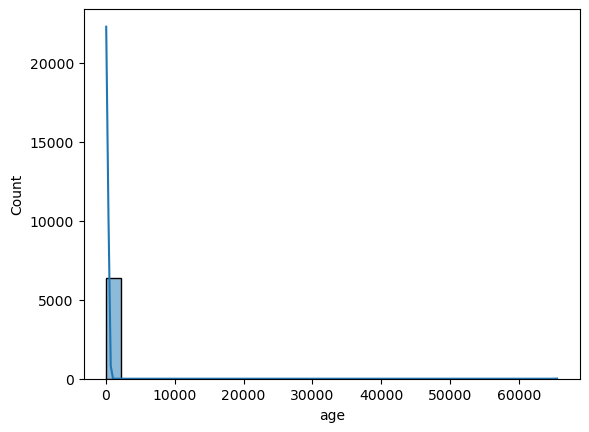

In [13]:
sns.histplot(df, x='age', kde=True, bins = 30)
plt.show()

Age has a value of >65k as we saw in the above statistics and viz which is a problem when looking at the avg. age in the dataset and also checking the distribution of the age.

Replace extreme values with NaN (assuming values greater than 100 are outliers)

In [14]:
df['age'] = df['age'].apply(lambda x: np.nan if x > 100 else x)

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,6345.0,62.402364,11.835541,41.00,54.00,62.00,72.000,97.00
lab_A_before,8730.0,108.700305,37.522670,2.00,87.00,104.00,126.000,600.00
lab_B_before,8363.0,0.976056,0.200360,0.17,0.86,0.96,1.065,2.33
lab_C_before,8370.0,113.640746,41.551650,1.40,93.00,109.00,128.000,881.00
lab_D_before,286.0,30.932343,22.980860,0.10,21.00,26.00,32.000,200.00
lab_A_after,8730.0,97.769977,68.427319,0.00,43.20,90.10,139.700,673.30
lab_B_after,8359.0,0.902942,0.992265,0.00,0.20,0.59,1.260,13.64
lab_C_after,8358.0,109.860254,197.693519,0.00,12.10,46.80,135.475,6738.10
lab_D_after,41.0,33.385366,70.241058,0.00,1.50,7.10,27.300,329.40


'age' column looks good where mean is 62 and max is 97. Now let's impute the missing values.

We can create a SimpleImputer instance for mean imputation for the age.

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
imputer = SimpleImputer(strategy='mean')
df['age'] = imputer.fit_transform(df[['age']])

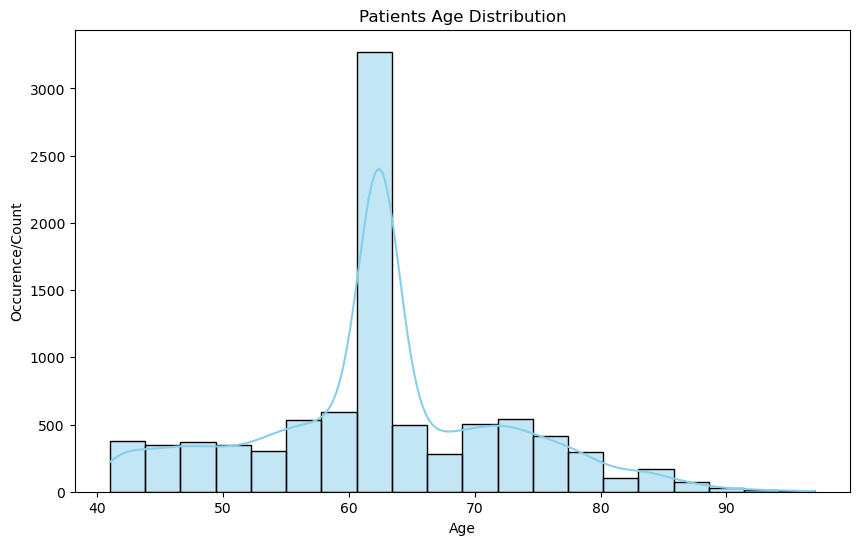

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='age', kde=True, bins =20, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Occurence/Count')
plt.title('Patients Age Distribution')
plt.show()

Now that we've noticed the age distribution is approximately normal, let's proceed to define age group categories.

In [19]:
bins = [40, 50, 60, 70, 80, 90, 99]  
labels = ['40-49', '50-59', '60-69', '70-79', '80-89', '90-97'] 
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

<Axes: xlabel='age_group', ylabel='count'>

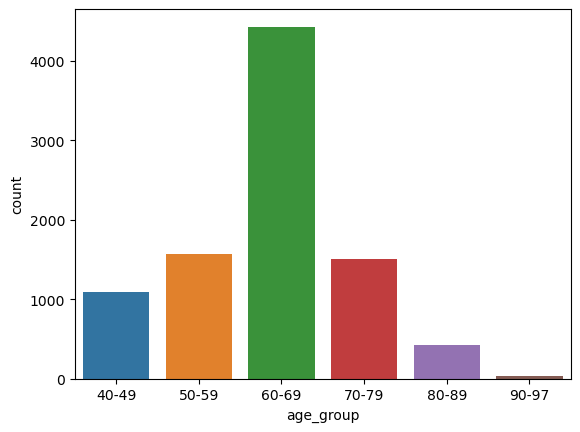

In [20]:
sns.countplot(data=df, x='age_group')

Above was an example of handling missing value and imputation for one of the column. Now let's check what other columns are still needed to be cleaned.

In [21]:
missing_data = df.isnull().sum()
missing_data


age                0
sex                0
race             173
medication         0
lab_A_before     325
lab_B_before     692
lab_C_before     685
lab_D_before    8769
lab_A_after      325
lab_B_after      696
lab_C_after      697
lab_D_after     9014
age_group          0
dtype: int64

Despite the presence of numerous missing values, particularly in the "Lab D before" and "Lab D after" columns, with approximately 99% of data missing, it is imperative to recognize the significance and relevance of the "Lab D" measurements in understanding the medication's effectiveness. In the current analysis, we won't eliminate these columns; instead, we'll apply imputation methods to address the missing data.

In [22]:
# Imputation Techniques
# Mean imputation for numerical columns
df.fillna(df.mean(), inplace=True)

# Frequent category imputation for categorical columns
df['race'].fillna(df['race'].mode()[0], inplace=True)


C:\Users\Pranav Bawa\AppData\Local\Temp\ipykernel_27132\3286285138.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [23]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,9055.0,62.402364,9.907167,41.00,57.000000,62.402364,68.000000,97.00
lab_A_before,9055.0,108.700305,36.843064,2.00,88.000000,106.000000,125.000000,600.00
lab_B_before,9055.0,0.976056,0.192551,0.17,0.870000,0.976056,1.050000,2.33
lab_C_before,9055.0,113.640746,39.948898,1.40,95.000000,112.000000,126.000000,881.00
lab_D_before,9055.0,30.932343,4.077261,0.10,30.932343,30.932343,30.932343,200.00
lab_A_after,9055.0,97.769977,67.187971,0.00,45.000000,93.600000,137.800000,673.30
lab_B_after,9055.0,0.902942,0.953364,0.00,0.230000,0.670000,1.190000,13.64
lab_C_after,9055.0,109.860254,189.931671,0.00,14.100000,56.900000,122.550000,6738.10
lab_D_after,9055.0,33.385366,4.668752,0.00,33.385366,33.385366,33.385366,329.40


In [24]:
missing_data = df.isnull().sum()
missing_data


age             0
sex             0
race            0
medication      0
lab_A_before    0
lab_B_before    0
lab_C_before    0
lab_D_before    0
lab_A_after     0
lab_B_after     0
lab_C_after     0
lab_D_after     0
age_group       0
dtype: int64

## Let's begin EDA process

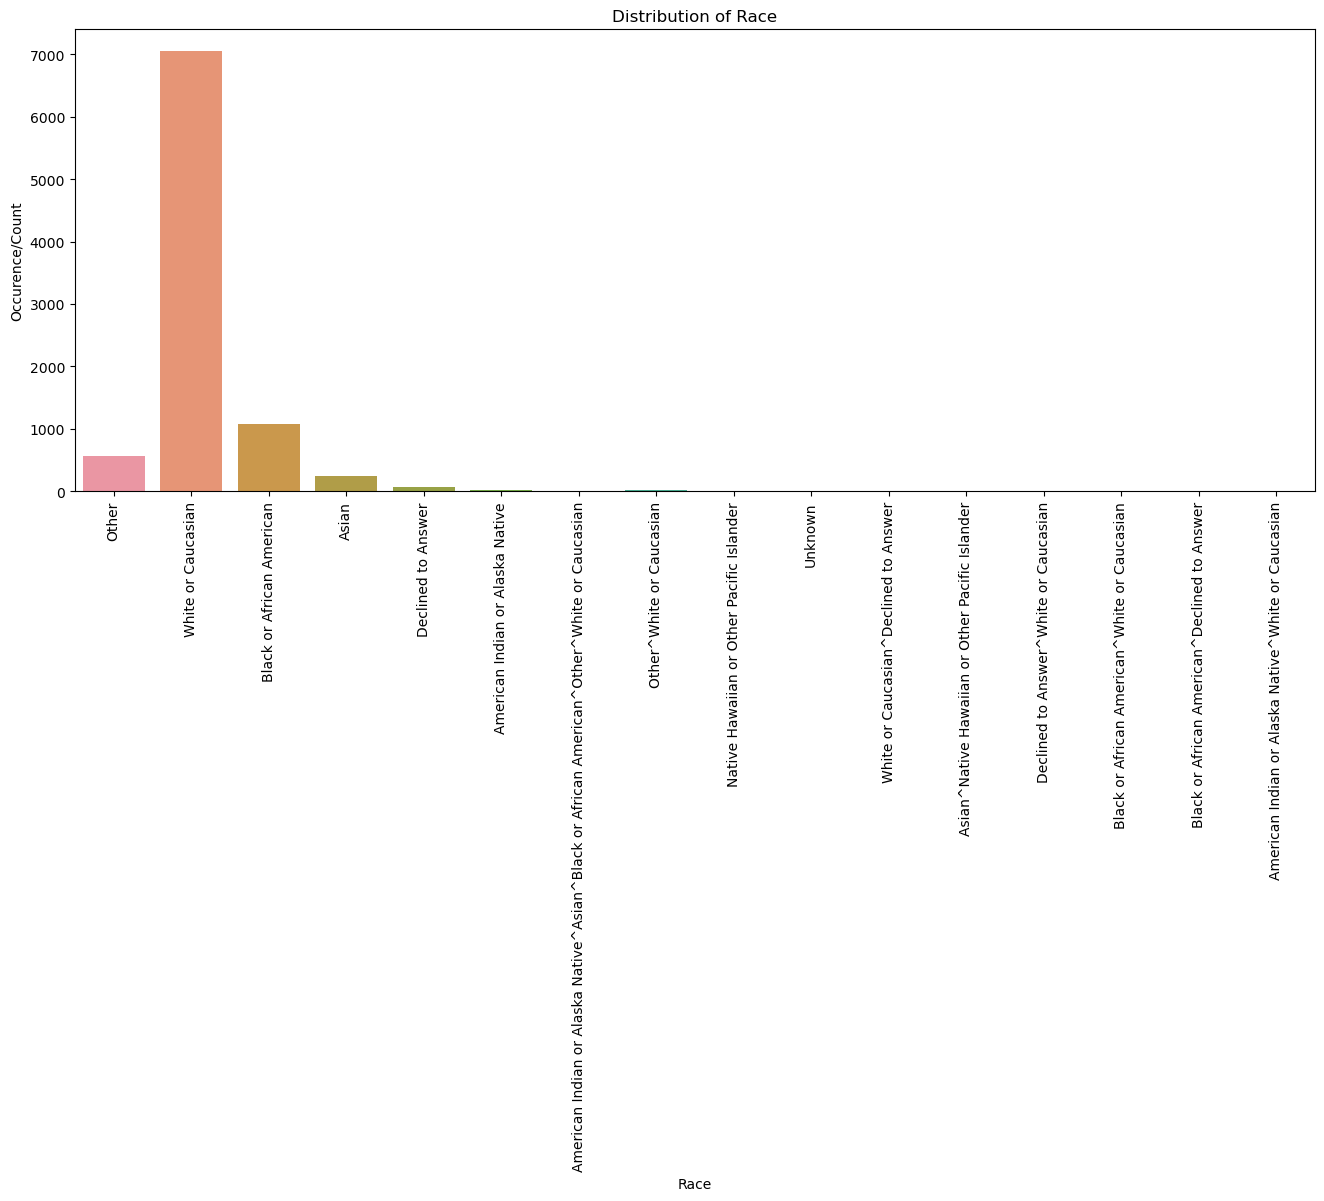

In [25]:
plt.figure(figsize=(16,6))
sns.countplot(df, x='race')
plt.xlabel('Race')
plt.ylabel('Occurence/Count')
plt.title('Distribution of Race')
plt.xticks(rotation=90)
plt.show()


In [26]:
df['race'].unique()

array(['Other', 'White or Caucasian', 'Black or African American',
       'Asian', 'Declined to Answer', 'American Indian or Alaska Native',
       'American Indian or Alaska Native^Asian^Black or African American^Other^White or Caucasian',
       'Other^White or Caucasian',
       'Native Hawaiian or Other Pacific Islander', 'Unknown',
       'White or Caucasian^Declined to Answer',
       'Asian^Native Hawaiian or Other Pacific Islander',
       'Declined to Answer^White or Caucasian',
       'Black or African American^White or Caucasian',
       'Black or African American^Declined to Answer',
       'American Indian or Alaska Native^White or Caucasian'],
      dtype=object)

Upon examination of the 'Race' distribution, it's evident that our dataset exhibits a skew towards the 'White or Caucasian' population, followed by the 'Black or African American' category. Nonetheless, we also observe the presence of other mixed race categories. To streamline our analysis, let's consider grouping these mixed race categories together.

In [27]:
# Replace 'Other' and 'Unknown' into one category 'Other/Unknown'
df['race'] = df['race'].replace(['Other', 'Unknown'], 'Other/Unknown')

# Identify and label rows with multiple race entries as 'Mixed'
df['race'] = df['race'].apply(lambda x: 'Mixed' if '^' in x else x)


Let's reclassify categories with very low counts as 'Other' to simplify the analysis and avoid overfitting.

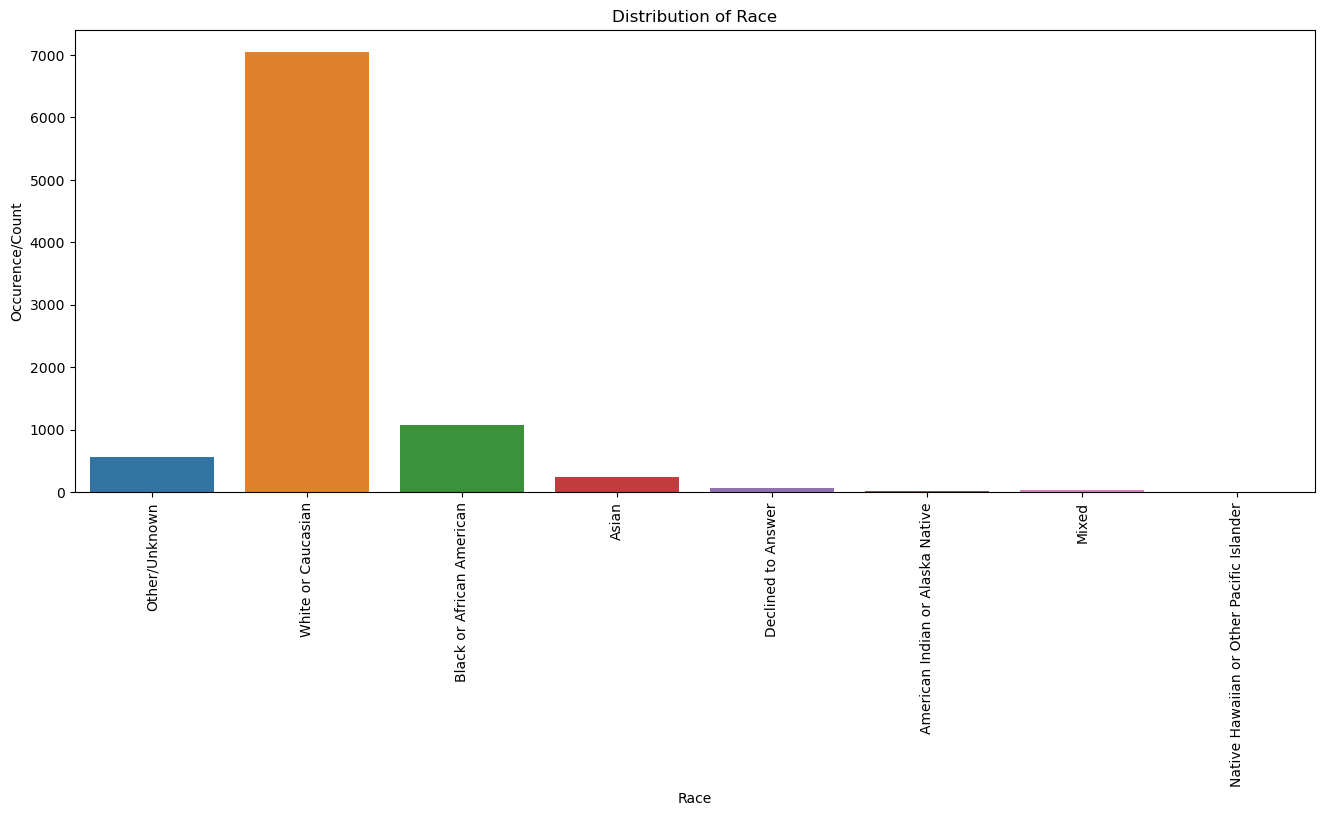

In [28]:
plt.figure(figsize=(16, 6))
sns.countplot(df, x='race')
plt.xlabel('Race')
plt.ylabel('Occurence/Count')
plt.title('Distribution of Race')
plt.xticks(rotation=90)
plt.show()


Given the low counts for 'American Indian' and 'Native Hawaiian,' we will consolidate them into an 'Other' category.

In [29]:
df['race'] = df['race'].replace(
    ['Native Hawaiian or Other Pacific Islander', 'American Indian or Alaska Native'], 'Other/Unknown')


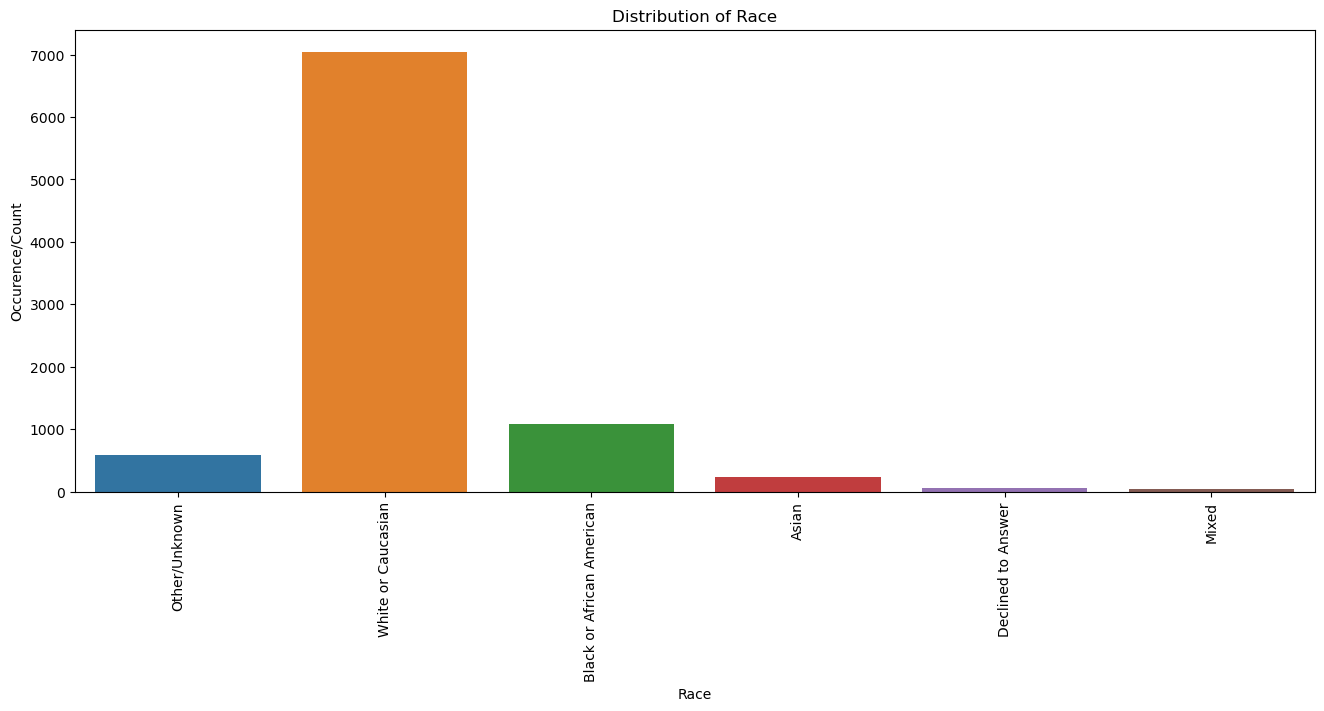

In [30]:
plt.figure(figsize=(16, 6))
sns.countplot(df, x='race')
plt.xlabel('Race')
plt.ylabel('Occurence/Count')
plt.title('Distribution of Race')
plt.xticks(rotation=90)
plt.show()


In our initial exploration, we aimed to identify whether it contains sufficient information and structure to address the research questions related to the effectiveness of breast cancer medications, the comparison of medication efficacy, and potential variations based on demographic characteristics. We have observed some initial insights that highlight both the strengths and weaknesses of the dataset.

**Strengths:**

- Medication and Lab Data: The dataset includes information on the four medications (Drug W, Drug X, Drug Y, and Drug Z) administered to patients, as well as lab measurements (lab_A, lab_B, lab_C, and lab_D) taken before and after treatment. This information is essential for evaluating medication effectiveness based on changes in lab values.

- Demographic Information: The dataset also contains demographic information about patients, including age, sex at birth, and race. This information can be valuable for examining potential variations in medication efficacy based on these characteristics.

**Weaknesses:**

- Missing Data: One of the most significant concerns is the presence of numerous missing entries in the dataset. For example, there are several rows where medication and lab information is missing. This missing data can limit the ability to draw meaningful conclusions about medication effectiveness or demographic variations.

- Limited Demographic Diversity: Although the dataset includes demographic information, it appears to be skewed towards a particular demographic group (e.g., predominantly White or Caucasian). This lack of diversity may hinder the generalizability of findings regarding demographic variations in medication efficacy.

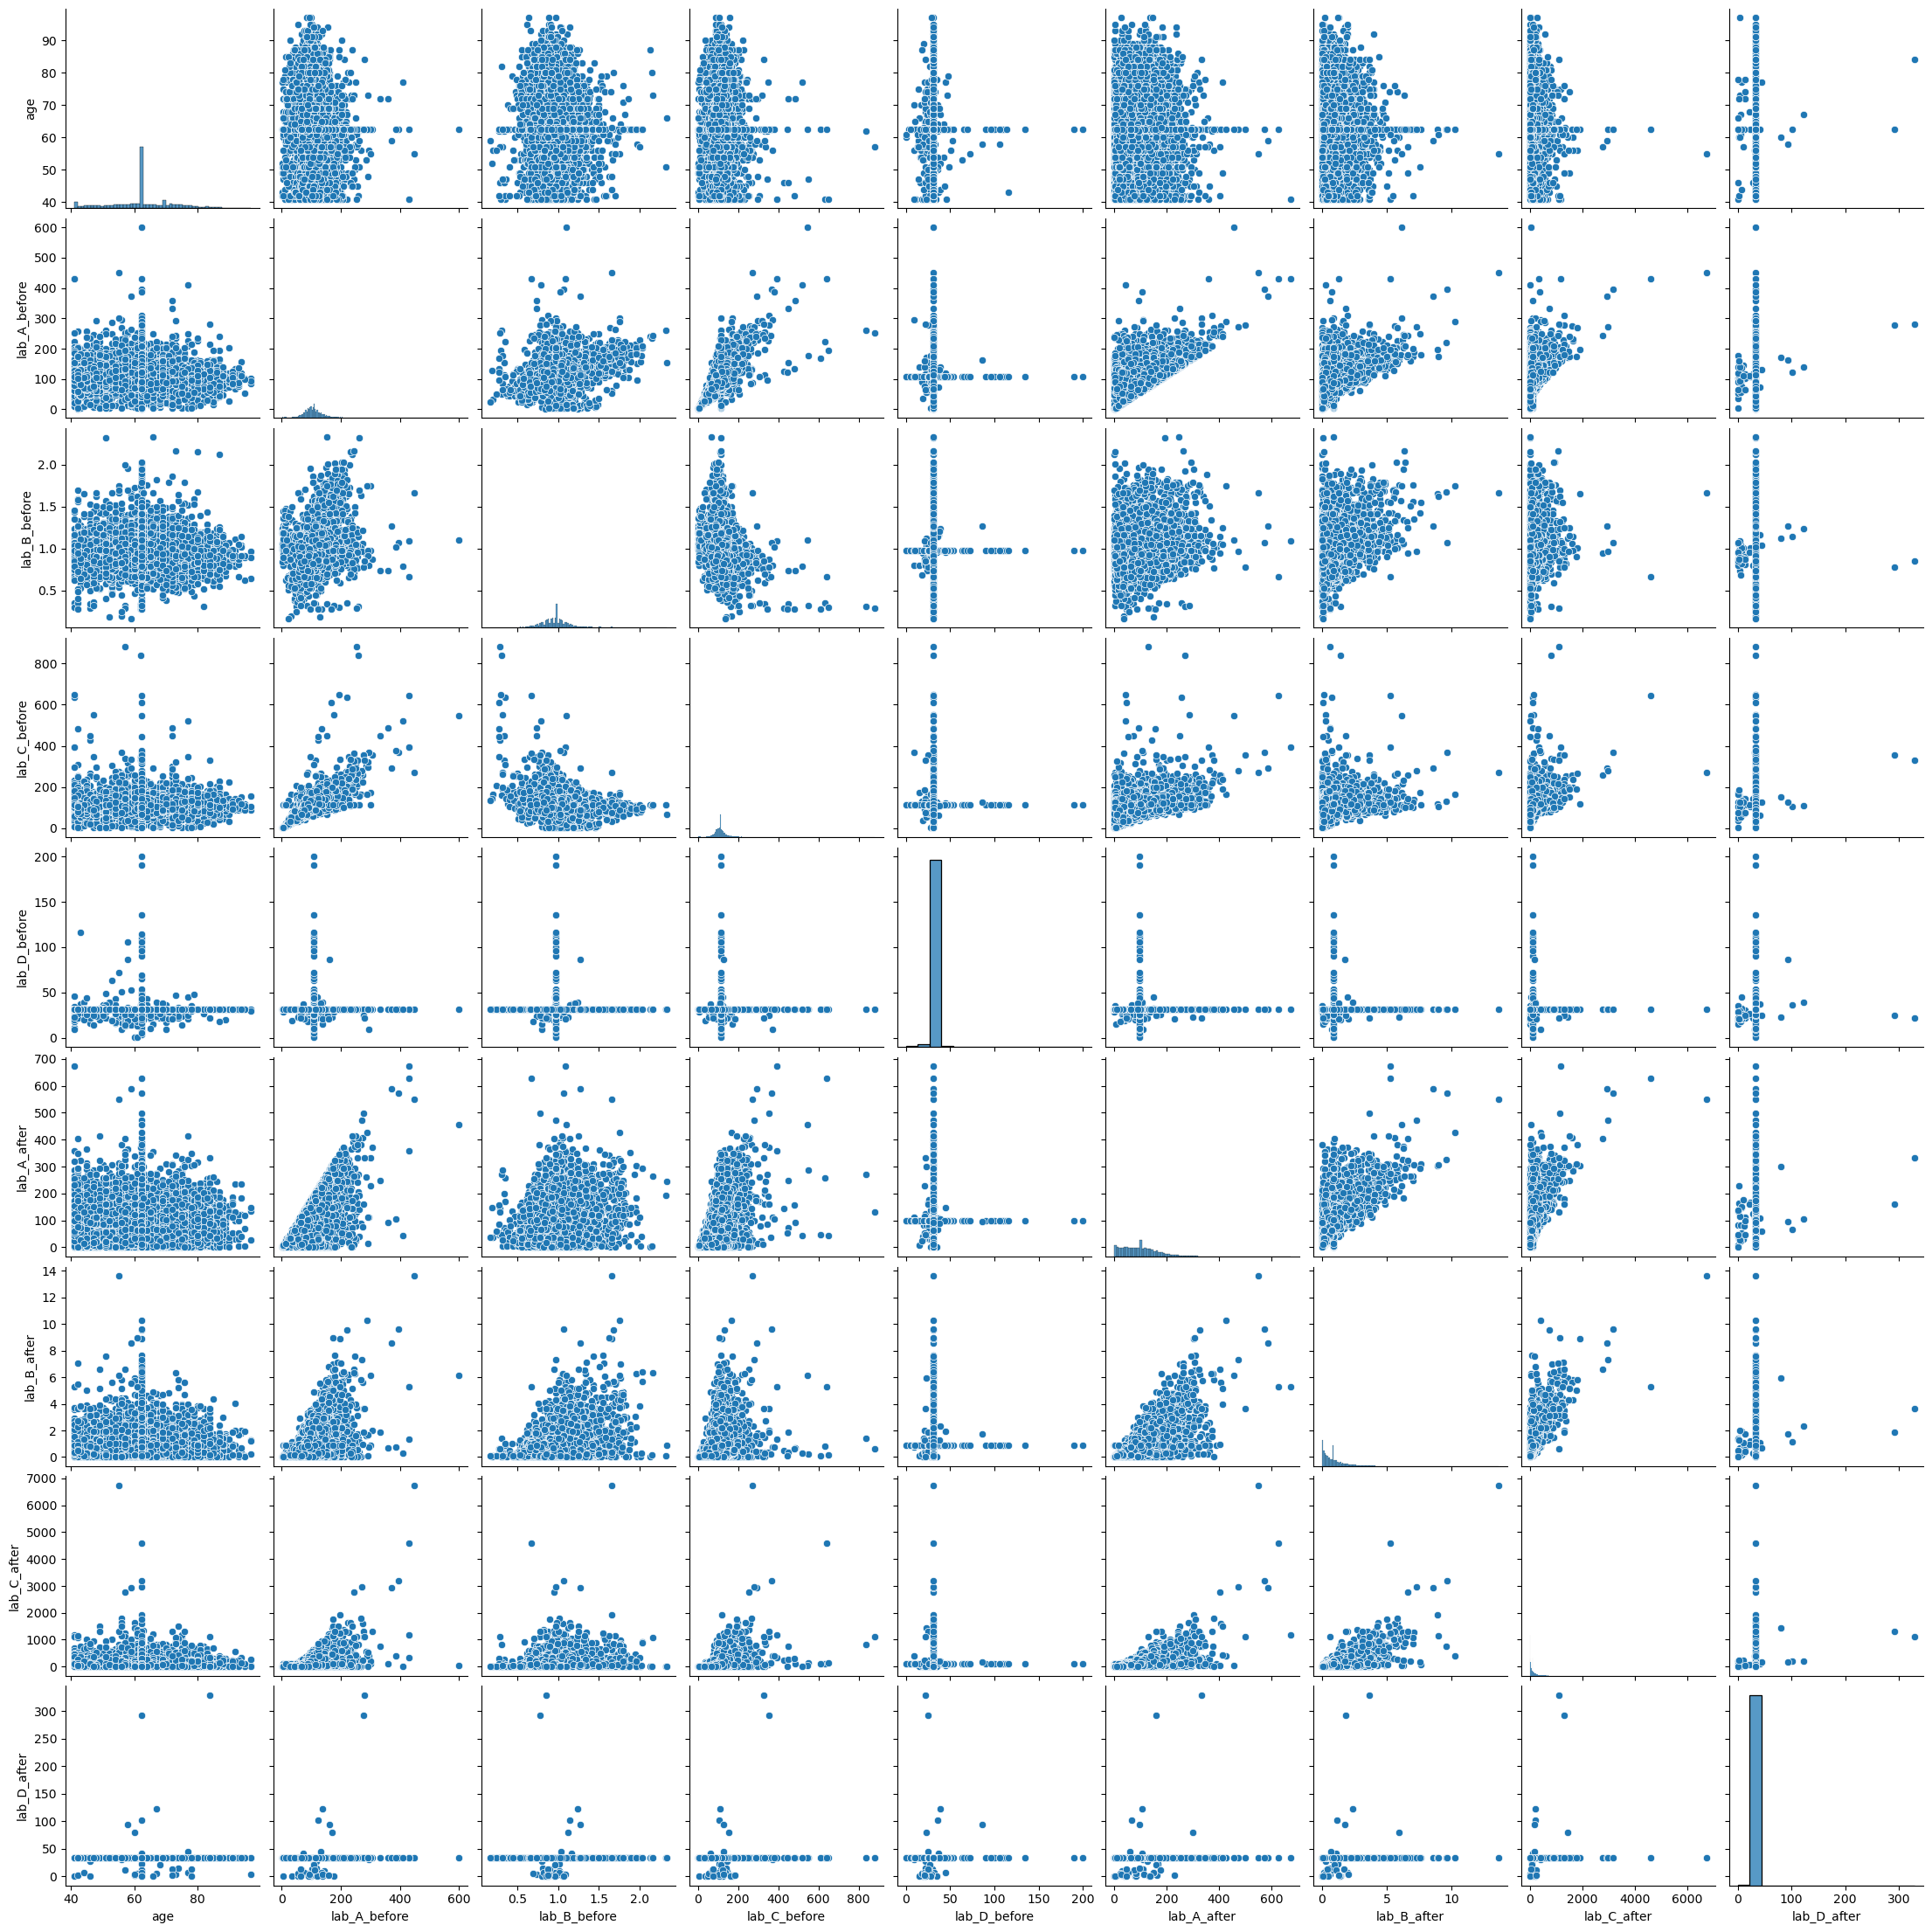

In [31]:
sns.pairplot(df)

The pairplot analysis does not reveal any strong relationships in the dataset, except for a subtle linear relationship between the A, B, and C Lab measurements and a weak relationship between the A, B, and C Lab measurements in the "after" columns.

C:\Users\Pranav Bawa\AppData\Local\Temp\ipykernel_27132\2548805414.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


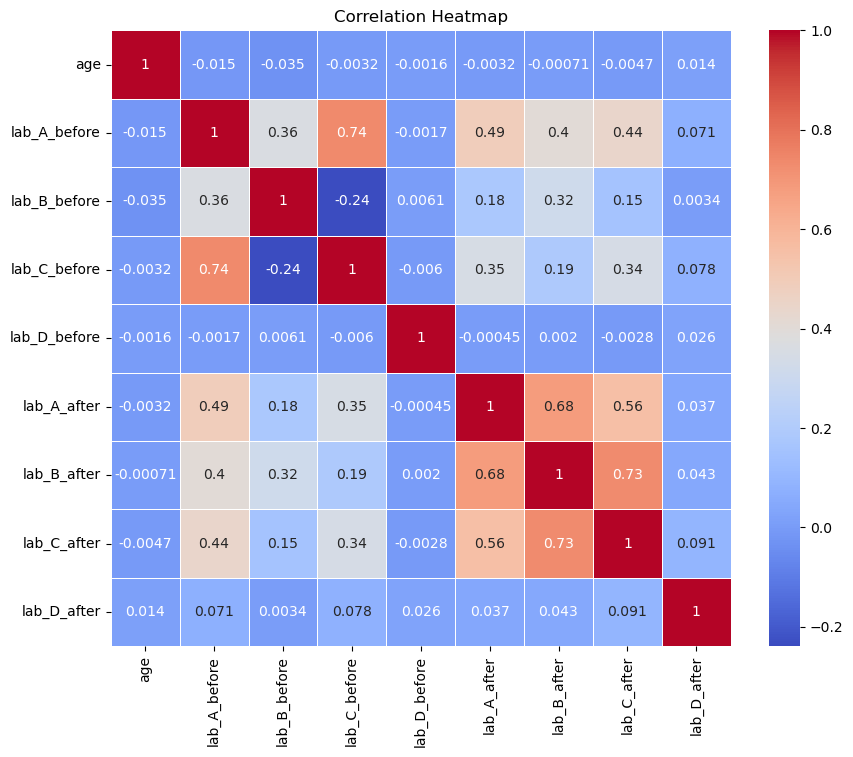

In [32]:
# Example correlation heatmap
plt.figure(figsize=(10,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Pair plot and correlation matrix heatmap shows these observations:

- Lab measurements before and after treatment(lab_A, lab_B, lab_C, and lab_D) show positive correlations with each other, indicating some consistency.

- Age does not strongly correlate with these lab measurements.

- 'lab_A_before' and 'lab_B_before' have a moderate positive correlation.

- 'lab_C_before' and 'lab_B_before' have a weaker positive correlation.

- 'lab_D_before' has weak correlations with other variables.

- Lab measurements after treatment('lab_A_after,' 'lab_B_after,' and 'lab_C_after') have strong positive correlations among themselves.

- 'lab_D_after' has minimal correlations with other variables.



<Axes: xlabel='medication', ylabel='count'>

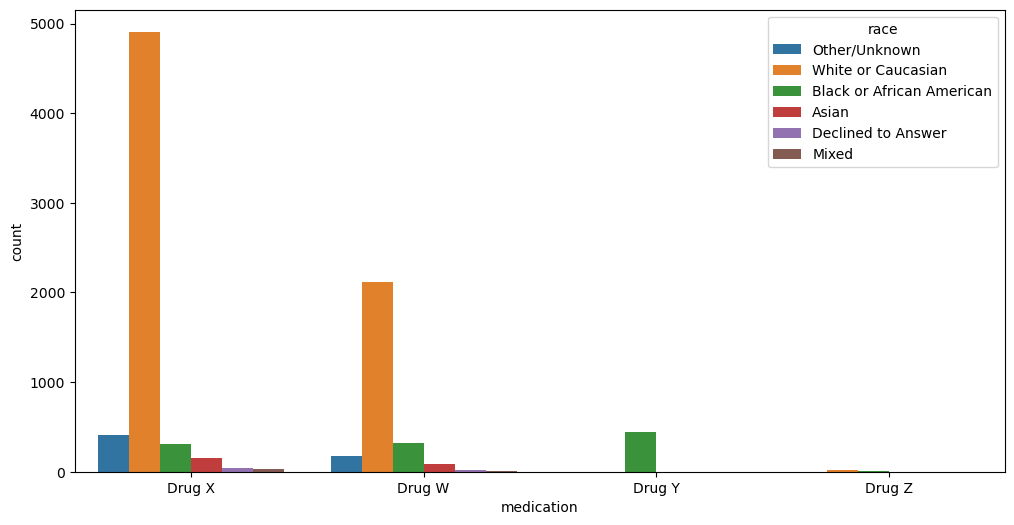

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(df, x='medication', hue='race')

We can observe in the above bar chart that "Drug X" is the most commonly used medication among various racial groups, with the highest usage among White or Caucasian individuals (4909). "Drug Y" is primarily used by Black or African American individuals (439), while "Drug Z" has relatively low usage across different racial groups, with the majority of users being White or Caucasian (15).

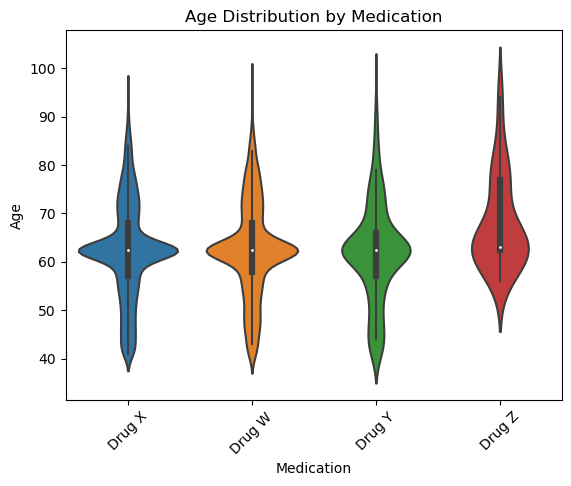

In [34]:
sns.violinplot(x='medication', y='age', data=df)
plt.xlabel('Medication')
plt.ylabel('Age')
plt.title('Age Distribution by Medication')
plt.xticks(rotation=45)
plt.show()


"Drug X" is the most widely used medication across all age groups, with the highest usage in the 60-69 age group. "Drug W" is also commonly used, with usage peaking in the 60-69 age group, while "Drug Y" and "Drug Z" have lower overall usage, primarily among individuals aged 40-59 and with minimal use in the older age groups.

In [35]:
df

,age,sex,race,medication,lab_A_before,lab_B_before,lab_C_before,lab_D_before,lab_A_after,lab_B_after,lab_C_after,lab_D_after,age_group
0,62.402364,Female,Other/Unknown,Drug X,108.700305,0.976056,113.640746,30.932343,97.769977,0.902942,109.860254,33.385366,60-69
1,62.402364,Female,White or Caucasian,Drug X,128.000000,0.976056,113.640746,30.932343,57.600000,0.902942,109.860254,33.385366,60-69
2,41.000000,Female,White or Caucasian,Drug X,108.700305,0.976056,113.640746,11.000000,97.769977,0.902942,109.860254,33.385366,40-49
3,62.402364,Female,Black or African American,Drug W,108.700305,0.976056,113.640746,26.000000,97.769977,0.902942,109.860254,33.385366,60-69
4,62.402364,Female,Black or African American,Drug W,108.700305,0.976056,113.640746,36.000000,97.769977,0.902942,109.860254,33.385366,60-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56.000000,Female,White or Caucasian,Drug X,64.000000,0.830000,77.000000,30.932343,91.700000,0.010000,0.900000,33.385366,50-59
9168,62.402364,Female,White or Caucasian,Drug W,91.000000,0.920000,99.000000,30.932343,2.600000,0.020000,1.700000,33.385366,60-69
9169,69.000000,Female,White or Caucasian,Drug X,113.000000,1.270000,89.000000,30.932343,173.100000,3.980000,89.600000,33.385366,60-69
9170,47.000000,Female,White or Caucasian,Drug X,75.000000,0.850000,88.000000,30.932343,18.800000,0.200000,1.800000,33.385366,40-49


Let's calculate the net change in before and after lab runs

In [36]:
for lab_test in ["lab_A", "lab_B", "lab_C", "lab_D"]:
    df[f"{lab_test}_change"] = df[f"{lab_test}_before"] - df[f"{lab_test}_after"]


In [37]:
df

,age,sex,race,medication,lab_A_before,lab_B_before,lab_C_before,lab_D_before,lab_A_after,lab_B_after,lab_C_after,lab_D_after,age_group,lab_A_change,lab_B_change,lab_C_change,lab_D_change
0,62.402364,Female,Other/Unknown,Drug X,108.700305,0.976056,113.640746,30.932343,97.769977,0.902942,109.860254,33.385366,60-69,10.930328,0.073114,3.780492,-2.453023
1,62.402364,Female,White or Caucasian,Drug X,128.000000,0.976056,113.640746,30.932343,57.600000,0.902942,109.860254,33.385366,60-69,70.400000,0.073114,3.780492,-2.453023
2,41.000000,Female,White or Caucasian,Drug X,108.700305,0.976056,113.640746,11.000000,97.769977,0.902942,109.860254,33.385366,40-49,10.930328,0.073114,3.780492,-22.385366
3,62.402364,Female,Black or African American,Drug W,108.700305,0.976056,113.640746,26.000000,97.769977,0.902942,109.860254,33.385366,60-69,10.930328,0.073114,3.780492,-7.385366
4,62.402364,Female,Black or African American,Drug W,108.700305,0.976056,113.640746,36.000000,97.769977,0.902942,109.860254,33.385366,60-69,10.930328,0.073114,3.780492,2.614634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56.000000,Female,White or Caucasian,Drug X,64.000000,0.830000,77.000000,30.932343,91.700000,0.010000,0.900000,33.385366,50-59,-27.700000,0.820000,76.100000,-2.453023
9168,62.402364,Female,White or Caucasian,Drug W,91.000000,0.920000,99.000000,30.932343,2.600000,0.020000,1.700000,33.385366,60-69,88.400000,0.900000,97.300000,-2.453023
9169,69.000000,Female,White or Caucasian,Drug X,113.000000,1.270000,89.000000,30.932343,173.100000,3.980000,89.600000,33.385366,60-69,-60.100000,-2.710000,-0.600000,-2.453023
9170,47.000000,Female,White or Caucasian,Drug X,75.000000,0.850000,88.000000,30.932343,18.800000,0.200000,1.800000,33.385366,40-49,56.200000,0.650000,86.200000,-2.453023


In [38]:
grouped_data = df.groupby(['age_group', 'race', 'medication'])[['lab_A_change', 'lab_B_change', 'lab_C_change', 'lab_D_change']].mean().reset_index()
grouped_data


,age_group,race,medication,lab_A_change,lab_B_change,lab_C_change,lab_D_change
0,40-49,Asian,Drug W,13.457143,0.468571,43.642857,-2.453023
1,40-49,Asian,Drug X,-2.833464,0.037527,-1.483457,-2.319647
2,40-49,Asian,Drug Y,NaN,NaN,NaN,NaN
3,40-49,Asian,Drug Z,NaN,NaN,NaN,NaN
4,40-49,Black or African American,Drug W,12.635500,0.158318,7.950988,-2.618079
...,...,...,...,...,...,...,...
139,90-97,Other/Unknown,Drug Z,NaN,NaN,NaN,NaN
140,90-97,White or Caucasian,Drug W,-19.012500,0.237500,28.475000,1.103605
141,90-97,White or Caucasian,Drug X,22.440000,0.033000,15.160000,-2.453023
142,90-97,White or Caucasian,Drug Y,NaN,NaN,NaN,NaN


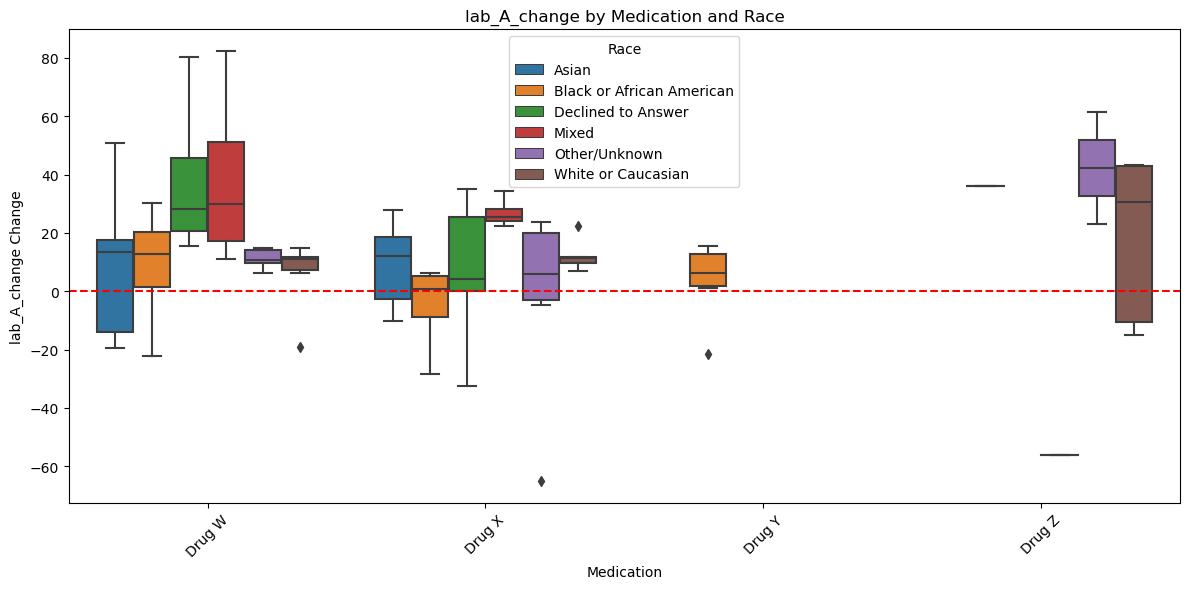

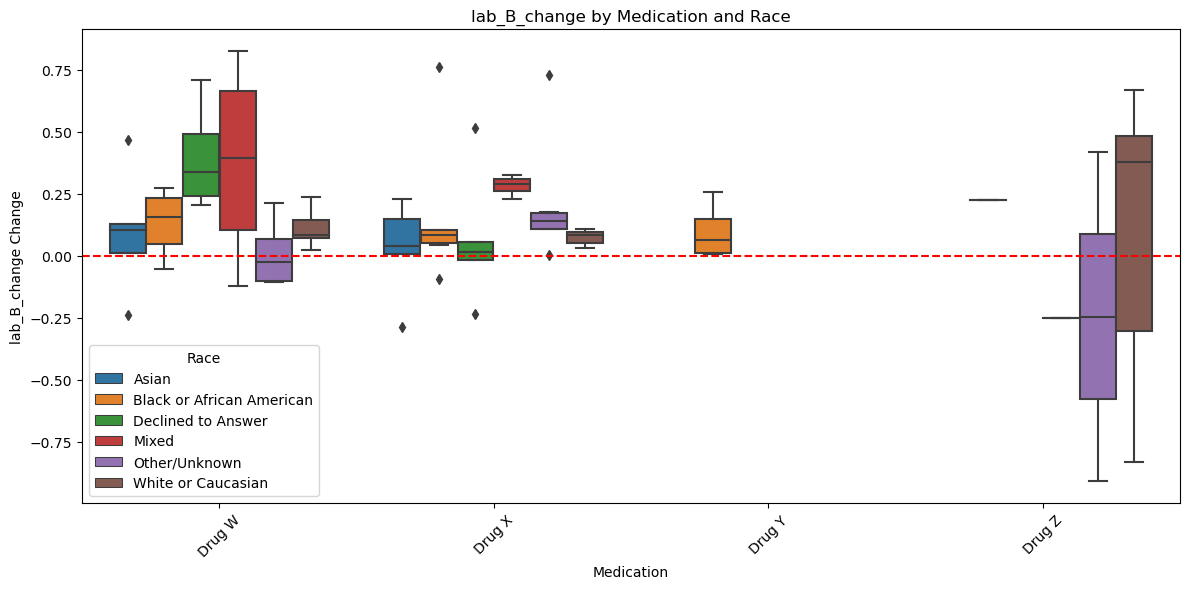

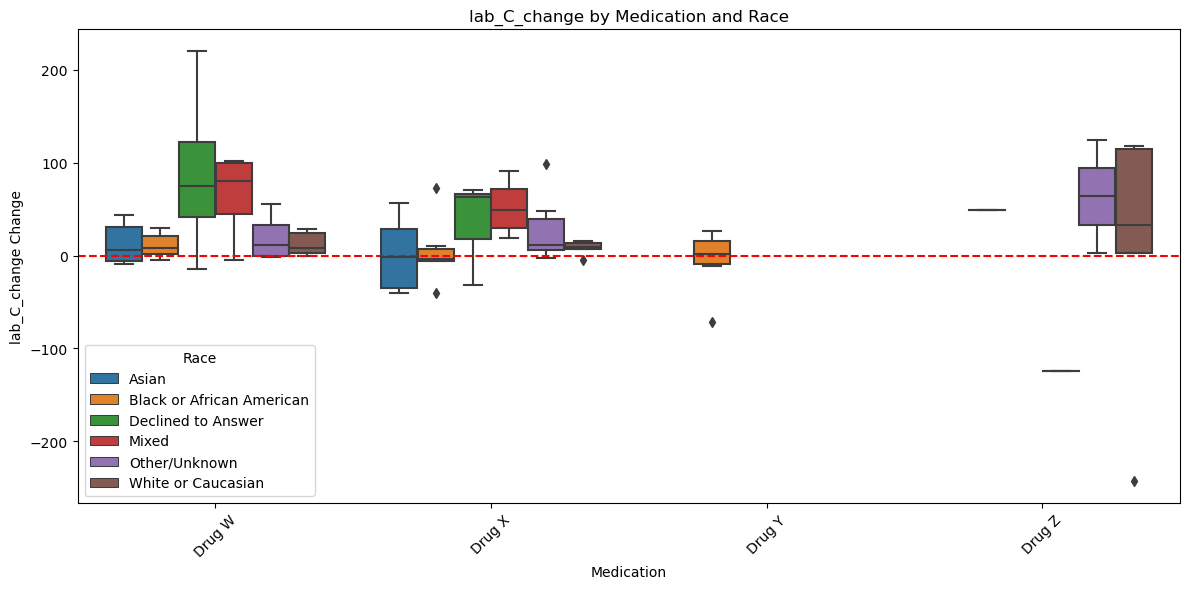

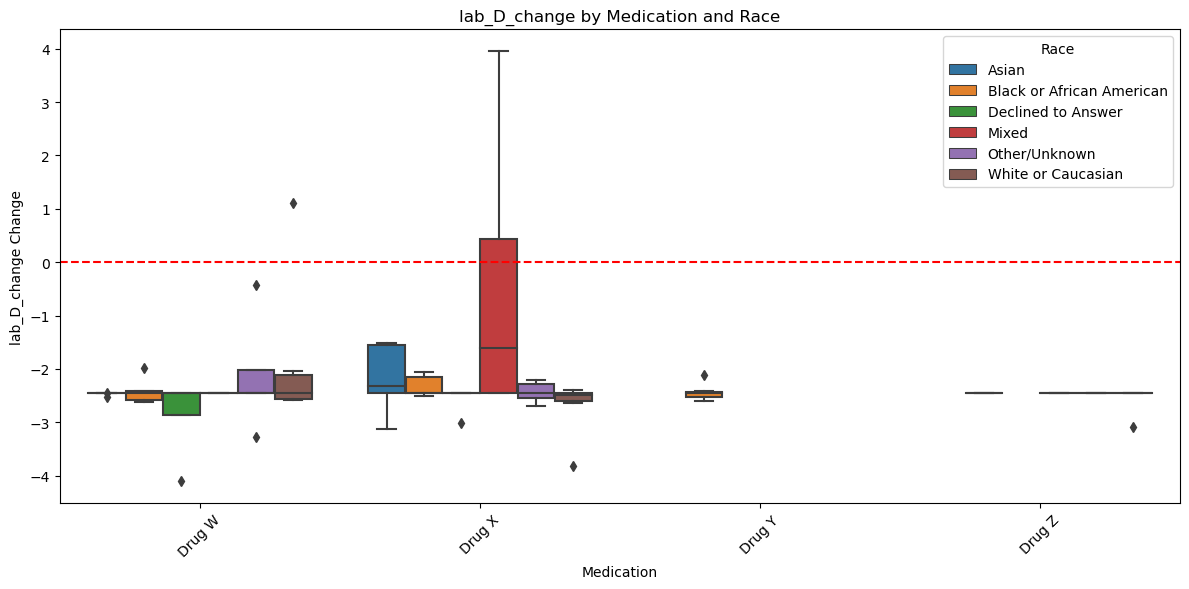

In [39]:
for lab in ['lab_A_change', 'lab_B_change', 'lab_C_change', 'lab_D_change']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='medication', y=lab, hue='race', data=grouped_data)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'{lab} by Medication and Race')
    plt.xlabel('Medication')
    plt.ylabel(f'{lab} Change')
    plt.xticks(rotation=45)
    plt.legend(title='Race')
    plt.tight_layout()
    plt.show()


Based on the average change in effectiveness scores for:

Lab A, we can make the following observations:

- For Asian individuals, Drug W and Drug X seem to be the most effective medications.
- For Black or African American individuals, Drug W and Drug Z show relatively high average effectiveness.
- For those who Declined to Answer, Drug W has the highest average effectiveness change.
- Mixed individuals have high average effectiveness changes for Drug W and Drug X.
- Other/Unknown individuals also show effectiveness with Drug W and Drug Z.
- For White or Caucasian individuals, Drug Z is the most effective medication, followed by Drug X.

Lab B, we can make the following observations:

- For Asian individuals, Drug W and Drug X appear to be the most effective medications.
- Among Black or African American individuals, Drug X has the highest average change in effectiveness score.
- Individuals who Declined to Answer seem to have the highest average change in effectiveness with Drug W.
- For Mixed individuals, both Drug W and Drug X have high average changes in effectiveness.
- Other/Unknown individuals show high average changes in effectiveness with Drug X.
- For White or Caucasian individuals, Drug X has the highest average change in effectiveness, followed by Drug W.

Lab C, we can make the following observations:

- For Asian individuals, Drug W appears to be the most effective medication, with a significantly high average change in effectiveness.
- Among Black or African American individuals, Drug Z has the highest average change in effectiveness, while Drug Y shows a negative change.
- Individuals who Declined to Answer have the highest average change in effectiveness with Drug W and Drug X.
- For Mixed individuals, both Drug W and Drug X have high average changes in effectiveness, but Drug Z shows a significant negative change.
- Other/Unknown individuals show high average changes in effectiveness with Drug X and Drug Z.
- For White or Caucasian individuals, Drug W has the highest average change in effectiveness, followed by Drug X.

Lab D we can make the following observations: 

Based on the average change in effectiveness scores, it's important to note that all medications show negative changes in effectiveness across all racial groups in this dataset. This is because we imputed 97% of the missing data. Observing and considerting Lab D results might not be right for this analysis.


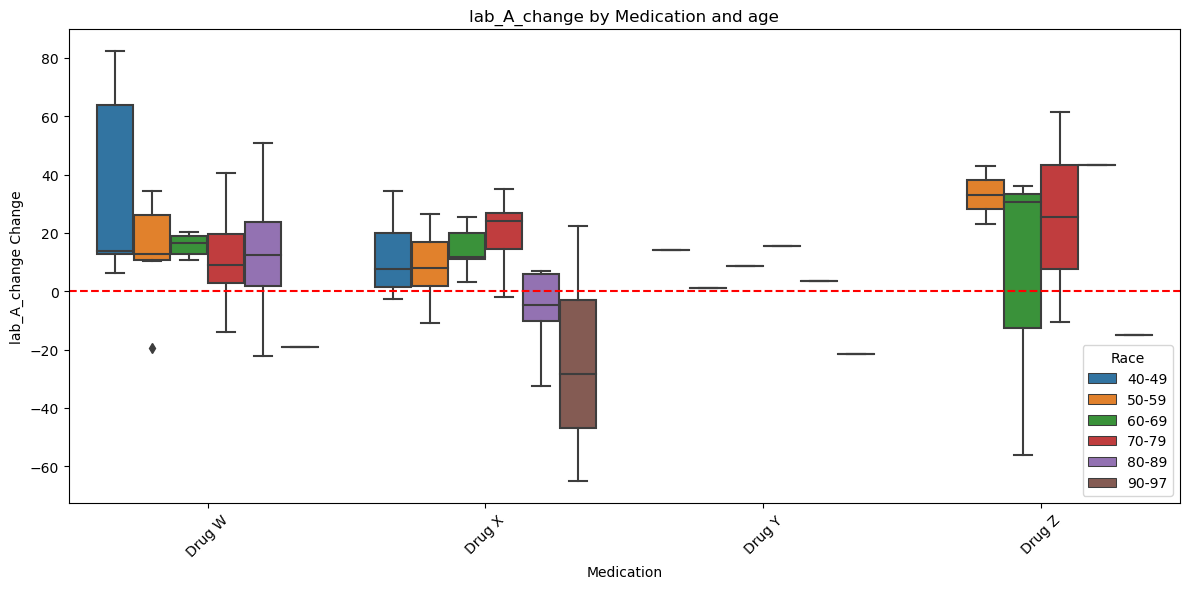

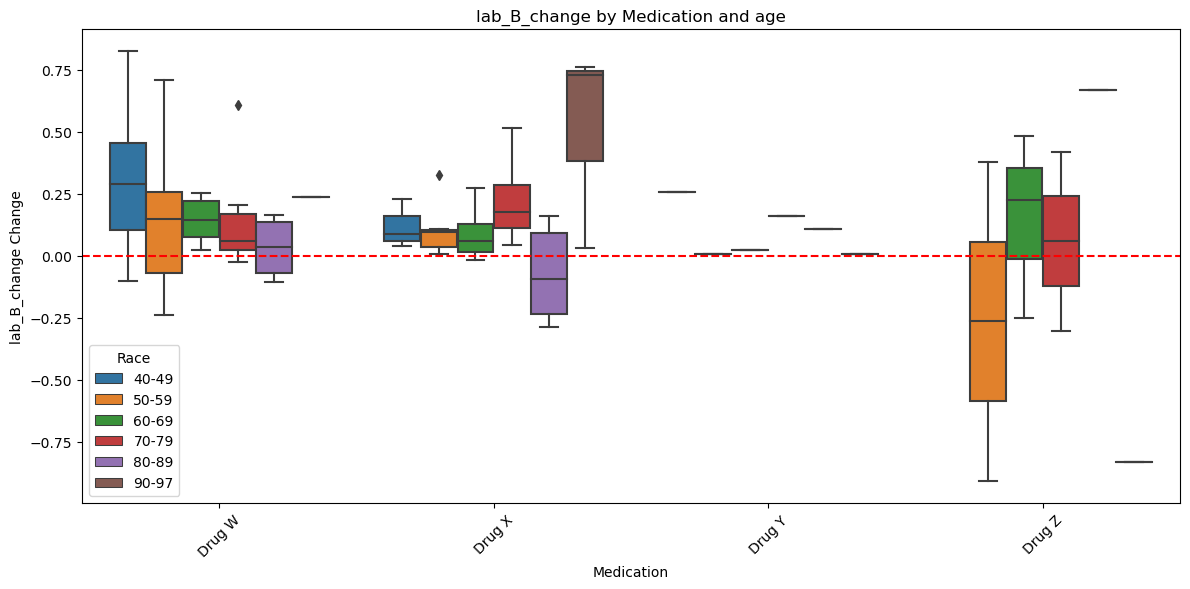

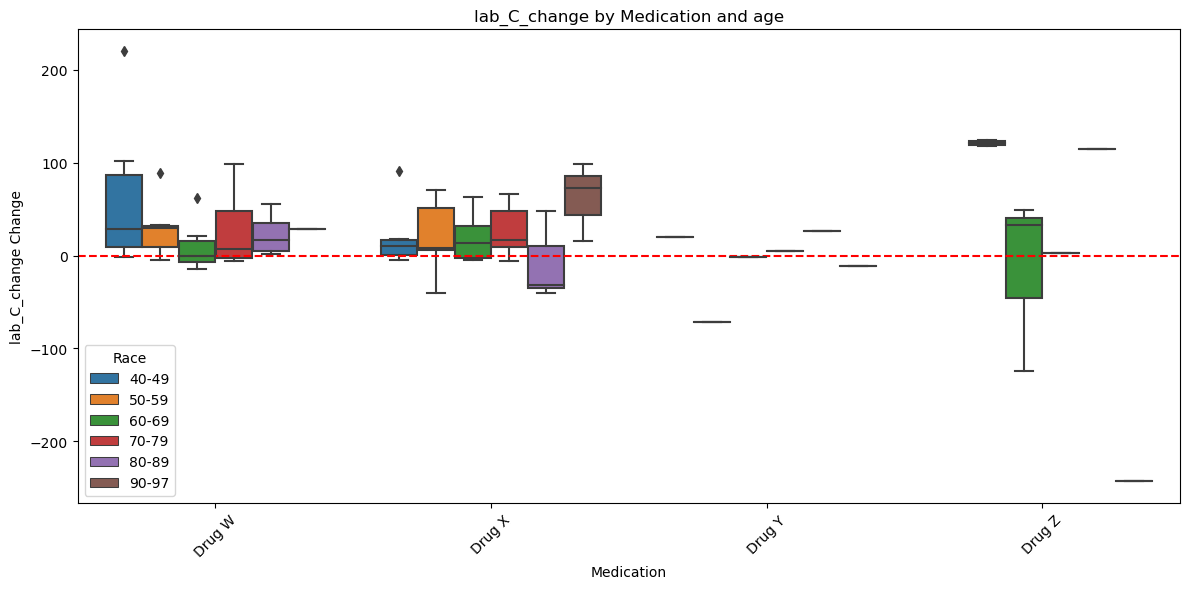

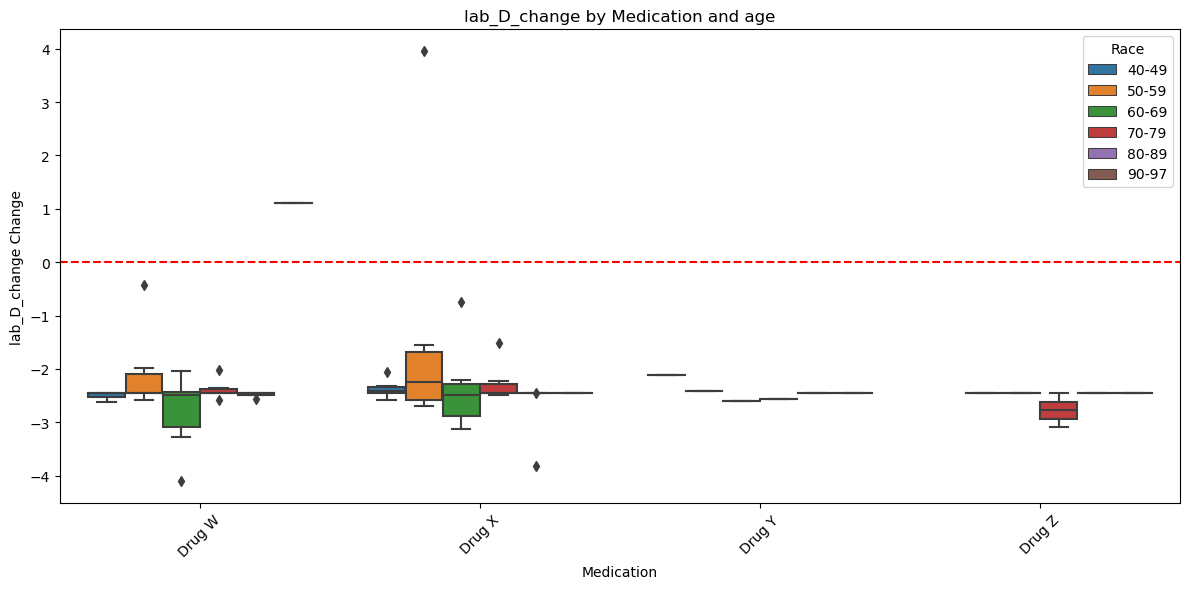

In [40]:

for lab in ['lab_A_change', 'lab_B_change', 'lab_C_change', 'lab_D_change']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='medication', y=lab, hue='age_group', data=grouped_data)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'{lab} by Medication and age')
    plt.xlabel('Medication')
    plt.ylabel(f'{lab} Change')
    plt.xticks(rotation=45)
    plt.legend(title='Race')
    plt.tight_layout()
    plt.show()

Lab A Observations by Medication and Age Group:

**Age Group 40-49:**
- Drug W has the highest average change in effectiveness, making it the most effective drug in this group.

**Age Group 50-59:**

- Drug Z has the highest average change in effectiveness, making it the most effective drug in this group.

**Age Group 60-69:**

- Drug W has the highest average change in effectiveness, making it the most effective drug in this group, closely followed by Drug X.

**Age Group 70-79:**

- Drug Z has the highest average change in effectiveness, making it the most effective drug in this group.

**Age Group 80-89:**

- Drug Z has the highest average change in effectiveness, making it the most effective drug in this group.

**Age Group 90-97:**

- None of the drugs show a positive change in effectiveness, but Drug Z has the least negative change, indicating it may be the relatively more effective option in this age group.

--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------

For Lab B observations:


**Age Group 40-49:**

- Drug Y has the highest average change in effectiveness, making it the most effective drug in this group.

**Age Group 50-59:**

- None of the drugs show a strong positive change in effectiveness. Drug W has the highest positive change, albeit relatively low.

**Age Group 60-69:**

- Drug Z has the highest average change in effectiveness, making it the most effective drug in this group.

**Age Group 70-79:**

- Drug X has the highest average change in effectiveness, making it the most effective drug in this group.

**Age Group 80-89:**

- Drug Z has the highest average change in effectiveness, making it the most effective drug in this group.

**Age Group 90-97:**

- None of the drugs show a positive change in effectiveness, but Drug Z has the least negative change, indicating it may be the relatively more effective option in this age group.


--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------

Lab C observations:

**Age Group 40-49:**

- Drug W has the highest average change in effectiveness, making it the most effective drug in this group.

**Age Group 50-59:**

- Drug Z has the highest average change in effectiveness, making it the most effective drug in this group.

**Age Group 60-69:**

- Drug X has the highest average change in effectiveness, making it the most effective drug in this group.

**Age Group 70-79:**

- Drug W has the highest average change in effectiveness, making it the most effective drug in this group.

**Age Group 80-89:**

- Drug Z has the highest average change in effectiveness, making it the most effective drug in this group.

**Age Group 90-97:**

- Drug X has the highest average change in effectiveness, making it the most effective drug in this group.

Lab D shows no affect/negative scores as we imputed 97% of the missing data. Observing and considerting Lab D results might not be right for this analysis. 


C:\Users\Pranav Bawa\AppData\Local\Temp\ipykernel_27132\829587971.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = grouped_data[['medication', 'lab_A_change', 'lab_B_change', 'lab_C_change', 'lab_D_change']].corr()


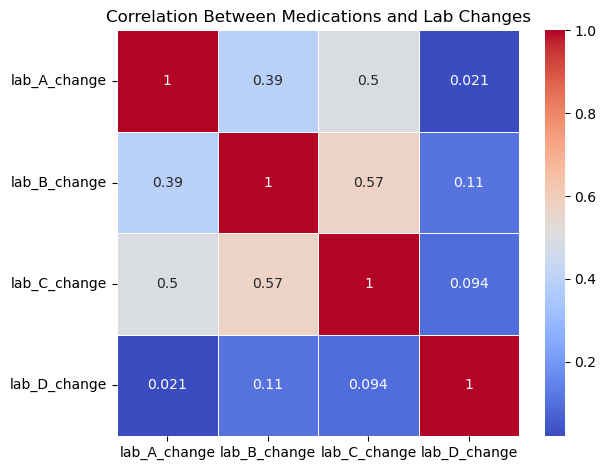

In [41]:
correlation_matrix = grouped_data[['medication', 'lab_A_change', 'lab_B_change', 'lab_C_change', 'lab_D_change']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Medications and Lab Changes')
plt.tight_layout()
plt.show()


The correlation matrix shows the relationships between different laboratory test changes (lab_A_change, lab_B_change, lab_C_change, and lab_D_change). 

- There is a moderate positive correlation between lab_A_change and lab_C_change (0.496) and a weaker positive correlation between lab_A_change and lab_B_change (0.389).

- Lab_B_change and lab_C_change also have a moderate positive correlation (0.575).

- Lab_D_change appears to have very weak correlations with the other variables, with the highest being a weak positive correlation with lab_B_change (0.110).

Overall, the matrix provides insights into the associations and strength of relationships between these laboratory test changes, which can be valuable for understanding potential dependencies in the data.

**Given that we lack information regarding the effectiveness and significance of individual lab results, it would be beneficial to aggregate Lab A through D to create an overall score. This approach will simplify the analysis and provide a broader perspective on the combined impact of these lab tests, making it less complex to assess individual lab results.**

In [42]:
grouped_data['total_change'] = grouped_data['lab_A_change']+grouped_data['lab_B_change']+grouped_data['lab_C_change']+grouped_data['lab_D_change']

In [43]:
grouped_data

,age_group,race,medication,lab_A_change,lab_B_change,lab_C_change,lab_D_change,total_change
0,40-49,Asian,Drug W,13.457143,0.468571,43.642857,-2.453023,55.115548
1,40-49,Asian,Drug X,-2.833464,0.037527,-1.483457,-2.319647,-6.599041
2,40-49,Asian,Drug Y,NaN,NaN,NaN,NaN,NaN
3,40-49,Asian,Drug Z,NaN,NaN,NaN,NaN,NaN
4,40-49,Black or African American,Drug W,12.635500,0.158318,7.950988,-2.618079,18.126726
...,...,...,...,...,...,...,...,...
139,90-97,Other/Unknown,Drug Z,NaN,NaN,NaN,NaN,NaN
140,90-97,White or Caucasian,Drug W,-19.012500,0.237500,28.475000,1.103605,10.803605
141,90-97,White or Caucasian,Drug X,22.440000,0.033000,15.160000,-2.453023,35.179977
142,90-97,White or Caucasian,Drug Y,NaN,NaN,NaN,NaN,NaN


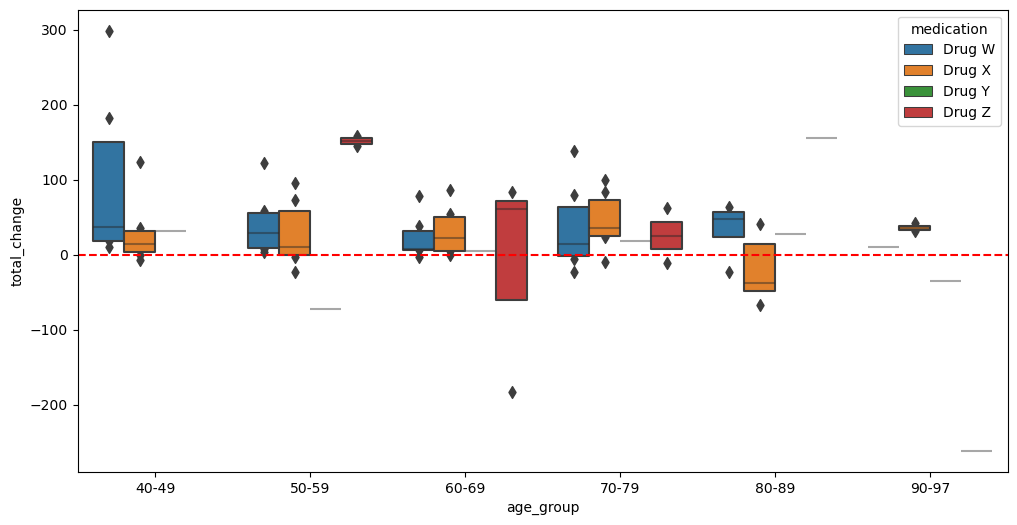

In [44]:
plt.figure(figsize=(12,6))
sns.boxenplot(data=grouped_data, x='age_group', y='total_change', hue='medication')
plt.axhline(0, color='red', linestyle='--')
plt.show()

Observation of total lab scores by Age Group:

**Age Group 40-49:**

- Drug W has the highest average change in effectiveness, making it the most effective drug in this group.

**Age Group 50-59:**

- Drug Z has the highest average change in effectiveness, making it the most effective drug in this group.

**Age Group 60-69:**

- Drug X has the highest average change in effectiveness, making it the most effective drug in this group.

**Age Group 70-79:**

- Drug X has the highest average change in effectiveness, making it the most effective drug in this group.

**Age Group 80-89:**

- Drug Z has the highest average change in effectiveness, making it the most effective drug in this group.

**Age Group 90-97:**

- Drug X has the highest average change in effectiveness, making it the most effective drug in this group.


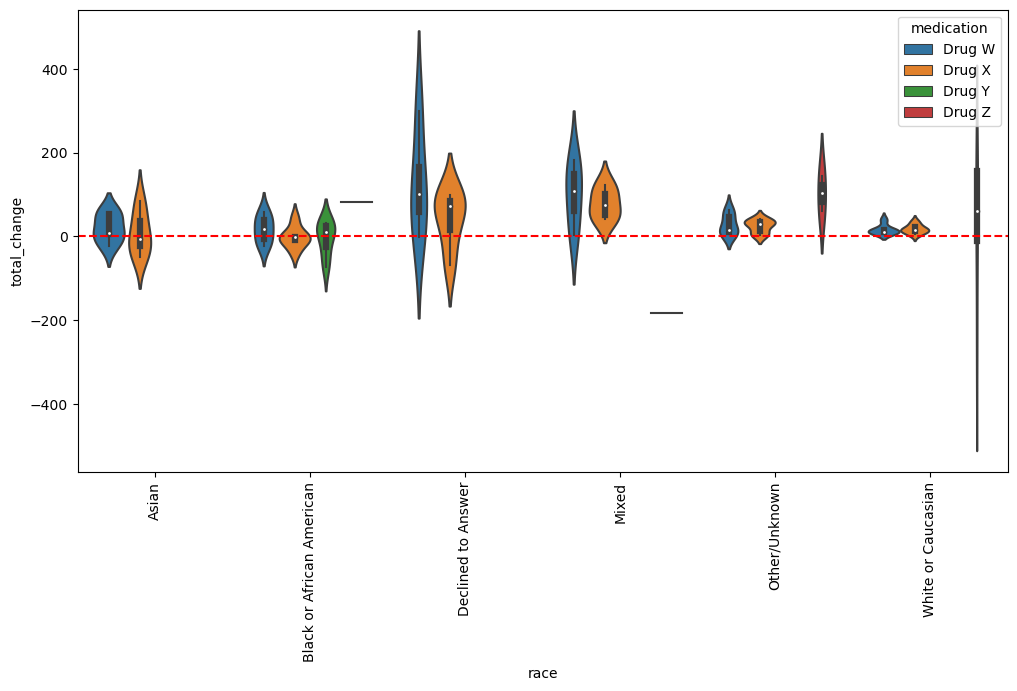

In [45]:
plt.figure(figsize=(12,6))
sns.violinplot(data=grouped_data, x='race', y='total_change', hue='medication')
plt.axhline(0, color='red', linestyle='--')
plt.xticks(rotation=90)
plt.show()

Observation of total lab scores by Race:


**Race: Asian**
- Drug W has the highest average change in effectiveness, making it the most effective drug in this group.

**Race: Black or African American**
- Drug Z has the highest average change in effectiveness, making it the most effective drug in this group.

**Race: Declined to Answer**
- Drug W has the highest average change in effectiveness, making it the most effective drug in this group.

**Race: Mixed**
- Drug W has the highest average change in effectiveness, making it the most effective drug in this group.

**Race: Other/Unknown**
- Drug Z has the highest average change in effectiveness, making it the most effective drug in this group.

**Race: White or Caucasian**
- Drug X has the highest average change in effectiveness, making it the most effective drug in this group.


In [46]:
ml_df = df[['race','age','medication','lab_A_change', 'lab_B_change', 'lab_C_change', 'lab_D_change']]
ml_df

,race,age,medication,lab_A_change,lab_B_change,lab_C_change,lab_D_change
0,Other/Unknown,62.402364,Drug X,10.930328,0.073114,3.780492,-2.453023
1,White or Caucasian,62.402364,Drug X,70.400000,0.073114,3.780492,-2.453023
2,White or Caucasian,41.000000,Drug X,10.930328,0.073114,3.780492,-22.385366
3,Black or African American,62.402364,Drug W,10.930328,0.073114,3.780492,-7.385366
4,Black or African American,62.402364,Drug W,10.930328,0.073114,3.780492,2.614634
...,...,...,...,...,...,...,...
9167,White or Caucasian,56.000000,Drug X,-27.700000,0.820000,76.100000,-2.453023
9168,White or Caucasian,62.402364,Drug W,88.400000,0.900000,97.300000,-2.453023
9169,White or Caucasian,69.000000,Drug X,-60.100000,-2.710000,-0.600000,-2.453023
9170,White or Caucasian,47.000000,Drug X,56.200000,0.650000,86.200000,-2.453023


**Let's build a simple machine learning model to understand which medication is most effective based on age, race, and the change in lab results (lower from before to after)**

In [47]:
le = LabelEncoder()
ml_df['race'] = le.fit_transform(ml_df['race'])
ml_df['medication'] = le.fit_transform(ml_df['medication'])

C:\Users\Pranav Bawa\AppData\Local\Temp\ipykernel_27132\4036110428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_df['race'] = le.fit_transform(ml_df['race'])
C:\Users\Pranav Bawa\AppData\Local\Temp\ipykernel_27132\4036110428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_df['medication'] = le.fit_transform(ml_df['medication'])


In [48]:
ml_df

,race,age,medication,lab_A_change,lab_B_change,lab_C_change,lab_D_change
0,4,62.402364,1,10.930328,0.073114,3.780492,-2.453023
1,5,62.402364,1,70.400000,0.073114,3.780492,-2.453023
2,5,41.000000,1,10.930328,0.073114,3.780492,-22.385366
3,1,62.402364,0,10.930328,0.073114,3.780492,-7.385366
4,1,62.402364,0,10.930328,0.073114,3.780492,2.614634
...,...,...,...,...,...,...,...
9167,5,56.000000,1,-27.700000,0.820000,76.100000,-2.453023
9168,5,62.402364,0,88.400000,0.900000,97.300000,-2.453023
9169,5,69.000000,1,-60.100000,-2.710000,-0.600000,-2.453023
9170,5,47.000000,1,56.200000,0.650000,86.200000,-2.453023


In [49]:
features = ['age', 'race', 'lab_A_change',
            'lab_B_change', 'lab_C_change', 'lab_D_change']
target = 'medication'

X = ml_df[features]
y = ml_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [50]:
rf_model = RandomForestClassifier()

In [51]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

C:\Users\Pranav Bawa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pranav Bawa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pranav Bawa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report: {report}")

Accuracy: 0.62
Classification Report:               precision    recall  f1-score   support

           0       0.31      0.12      0.18       826
           1       0.68      0.86      0.76      1775
           2       0.32      0.41      0.36       111
           3       0.00      0.00      0.00         5

    accuracy                           0.62      2717
   macro avg       0.33      0.35      0.32      2717
weighted avg       0.55      0.62      0.57      2717



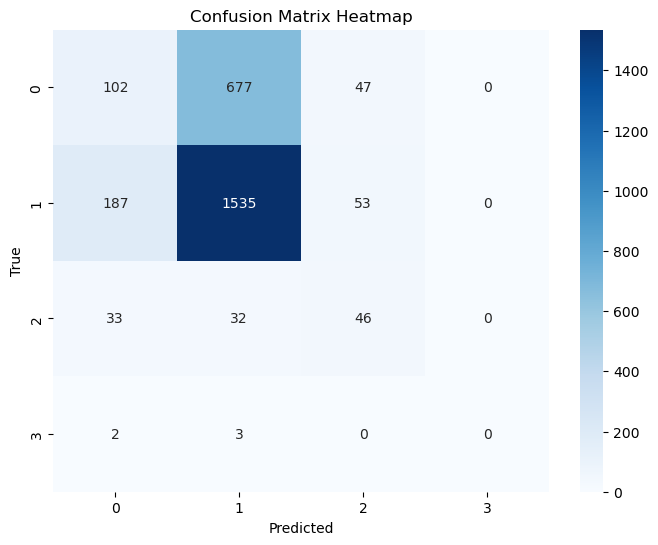

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

Summary of the model's performance:

- **Accuracy:** The model achieved an accuracy of 62%.

- **Classification Report:** The model's precision, recall, and F1-score vary across classes, with class 1 having the highest values. Class 3 had no correct predictions (precision, recall, and F1-score of 0).

- **Confusion Matrix:** The model had varying success in predicting different classes, with class 1 having the most accurate predictions, while class 3 had no correct predictions.

Looks like the Random Forest is not doing a great job in predicting. Let's explore other models and if we see the same results we might need additional features.

In [60]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic:.2f}")
print("Confusion Matrix:")
print(conf_matrix_logistic)
print("\nClassification Report:")
print(report_logistic)

Logistic Regression Accuracy: 0.64
Confusion Matrix:
[[   0  802   24    0]
 [   0 1732   43    0]
 [   0  111    0    0]
 [   0    5    0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       826
           1       0.65      0.98      0.78      1775
           2       0.00      0.00      0.00       111
           3       0.00      0.00      0.00         5

    accuracy                           0.64      2717
   macro avg       0.16      0.24      0.20      2717
weighted avg       0.43      0.64      0.51      2717



C:\Users\Pranav Bawa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pranav Bawa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pranav Bawa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and bei

Logistic Regression seems to bit of improvement in accuracy.

In conclusion, to answer below questions and supporting the hypothesis:

- How effective are these medications?
- Which of these medications is most effective?
- Does the efficacy of these medications vary depending on patients’ demographic characteristics?


Based on the provided observations, we can make the following conclusions about the effectiveness of medications and how they vary depending on patients' demographic characteristics:

1. **Effectiveness of Medications**:
   - In Lab A, Drug W and Drug X appear to be effective for Asian individuals.
   - In Lab B, Drug X and Drug W seem to be effective for Asian individuals.
   - In Lab C, Drug W is effective for Asian individuals.
   - Across all labs, Drug Z is consistently effective for Black or African American individuals.
   - Drug X and Drug W show effectiveness for Mixed individuals.
   - Drug X and Drug Z are effective for Other/Unknown individuals.
   - For White or Caucasian individuals, Drug Z and Drug X are effective.

2. **Most Effective Medication**:
   - The most effective medication varies depending on the patient's demographic characteristics.
   - For Asian individuals, Drug W and Drug X are often the most effective.
   - For Black or African American individuals, Drug Z is consistently effective.
   - For Mixed individuals, both Drug W and Drug X are effective.
   - For Other/Unknown individuals, Drug Z is effective.
   - For White or Caucasian individuals, Drug X and Drug Z are often effective.

3. **Efficacy Variation by Demographic Characteristics**:
   - Yes, the efficacy of these medications varies significantly depending on patients' demographic characteristics, including race and age.
   - Different medications show higher effectiveness in different racial groups. For example, Drug Z is consistently effective for Black or African American individuals, while Drug X and Drug W are effective for Asian individuals.
   - The choice of the most effective medication also varies by age group. For instance, in the 40-49 age group, Drug W is most effective, whereas in the 60-69 age group, Drug X is most effective.
   - It's important to note that there are variations in effectiveness within each demographic group, so individual patient profiles should be considered when prescribing medications.

In summary, the effectiveness of medications varies by both race and age group, with different drugs showing higher efficacy in different demographic categories. We should be considering these variations when making treatment decisions and take into account individual patient characteristics to optimize treatment outcomes. Additionally, it's crucial to be cautious when interpreting results from Lab D, as it shows no positive change in effectiveness due to a high amount of missing data.